## Explory Data Analysis (EDA) for Group Project

### STAT 3612 

#### Learning Outcomes:
- Become familiar with the group project workflow
- Develop overall understanding of the project dataset
- Perform basic EDA skills

##### 1. Importing the required libraries for EDA.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

##### 2. Loading the data into the data frame.

In [2]:
# TODO: change this to yours ...
DATA_DIR = "/Users/kwongtszkong/Desktop/STAT3612 Statistical ML/Group Project/Stat3612_Project_datasource"

# read 3 csv files and 1 pkl file
train_csv_file = os.path.join(DATA_DIR, "train.csv")
val_csv_file = os.path.join(DATA_DIR, "valid.csv")
test_csv_file = os.path.join(DATA_DIR, "test.csv")
ehr_pkl_file = os.path.join(DATA_DIR, "ehr_preprocessed_seq_by_day_cat_embedding.pkl")

train_df = pd.read_csv(train_csv_file)
val_df = pd.read_csv(val_csv_file)
test_df = pd.read_csv(test_csv_file)

with open(ehr_pkl_file, 'rb') as f:
    ehr_data = pd.read_pickle(f)

#### 3. Check the type and shape of the data

In [3]:
train_df.head(5)

,id,subject_id,hadm_id,dicom_id,study_id,ViewPosition,image_path,readmitted_within_30days
0,10869829_25238191,10869829,25238191,78ab2105-42f58137-487be951-2fb5b70a-f3f76660,53096236,AP,78ab2105-42f58137-487be951-2fb5b70a-f3f76660.jpg,False
1,10869829_25238191,10869829,25238191,64e61e55-13c7ddf7-70e4a8d8-940cec1c-084a6f23,53621244,AP,64e61e55-13c7ddf7-70e4a8d8-940cec1c-084a6f23.jpg,False
2,10869829_25238191,10869829,25238191,cc0d53de-4a394a45-dde65f7c-b022a912-5c0d3e5c,56056422,AP,cc0d53de-4a394a45-dde65f7c-b022a912-5c0d3e5c.jpg,False
3,12347278_29852086,12347278,29852086,ddf639da-d1c80371-03a928d3-91075ec2-3bbaf396,51319270,AP,ddf639da-d1c80371-03a928d3-91075ec2-3bbaf396.jpg,False
4,12347278_29852086,12347278,29852086,4c828aa8-78980d32-20a70ec1-5f2de42d-bda06863,52234220,AP,4c828aa8-78980d32-20a70ec1-5f2de42d-bda06863.jpg,False


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49451 entries, 0 to 49450
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        49451 non-null  object
 1   subject_id                49451 non-null  int64 
 2   hadm_id                   49451 non-null  int64 
 3   dicom_id                  49451 non-null  object
 4   study_id                  49451 non-null  int64 
 5   ViewPosition              49451 non-null  object
 6   image_path                49451 non-null  object
 7   readmitted_within_30days  49451 non-null  bool  
dtypes: bool(1), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
n_patient = len(train_df["subject_id"].unique())
n_admission = len(train_df["hadm_id"].unique())
print(f"The unique number of subjects: {n_patient}")
print(f"The unique number of admissions: {n_admission}")
print(f"Average number of admissions per patient: {n_admission/n_patient}")

The unique number of subjects: 6625
The unique number of admissions: 8234
Average number of admissions per patient: 1.2428679245283019


In [6]:
train_df.drop_duplicates(subset=["id"], keep="first")["readmitted_within_30days"].value_counts()


readmitted_within_30days
False    6785
True     1449
Name: count, dtype: int64

In [7]:
val_df.drop_duplicates(subset=["id"], keep="first")["readmitted_within_30days"].value_counts()

readmitted_within_30days
False    2307
True      481
Name: count, dtype: int64

In [8]:
train_df.drop_duplicates(subset=["id"], keep="first")["readmitted_within_30days"].value_counts().plot.bar()

<Axes: xlabel='readmitted_within_30days'>

In [9]:
print(f"Type of EHR data: {type(ehr_data)}")
print(ehr_data.keys())


Type of EHR data: <class 'dict'>
dict_keys(['feat_dict', 'feature_cols', 'cat_idxs', 'cat_dims', 'demo_cols', 'icd_cols', 'lab_cols', 'med_cols'])


In [10]:
# Here we check the first key: feat_dict
# It contains the features of each 
print(type(ehr_data["feat_dict"]))
print(len(ehr_data["feat_dict"].keys()))
print(list(ehr_data["feat_dict"].keys())[:5])

<class 'dict'>
14532
['10869829_25238191', '17910612_22301530', '16026764_21404901', '12347278_29852086', '18463717_24608289']


In [11]:
print(type(ehr_data["feat_dict"]["10869829_25238191"]))
print(ehr_data["feat_dict"]["10869829_25238191"].shape)

# For each admission, we have a matrix of shape (n_days, n_features) to represent its EHR feature,
# where n_days is the number of days in the admission, and n_features (171) is the number of features.

<class 'numpy.ndarray'>
(13, 171)


In [12]:
print(type(ehr_data["cat_idxs"]))
print(len(ehr_data["cat_idxs"]))
print(ehr_data["cat_idxs"][:])
# cat_idxs denote the indices of categorical features in the feature matrix.

<class 'list'>
38
[1, 2, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]


In [13]:
print(type(ehr_data["cat_dims"]))
print(len(ehr_data["cat_dims"]))
print(ehr_data["cat_dims"][:])
# cat_dims denote the feature dimension for each categorical feature.

<class 'list'>
38
[2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


The EHR data has 171 features, which can be divided into 4 groups:
1. demongraphic features (3)
2. ICD features (91)
3. Laboratory test results (36)
4. Medications (41)

In [14]:
print(type(ehr_data["demo_cols"]))
print(len(ehr_data["demo_cols"]))
print(ehr_data["demo_cols"])

<class 'list'>
3
['age', 'gender', 'ethnicity']


In [15]:
print(type(ehr_data["icd_cols"]))
print(len(ehr_data["icd_cols"]))
print(ehr_data["icd_cols"][:5])

<class 'list'>
91
['Y90-Y99', 'G30-G32', 'O85-O92', 'C60-C63', 'F40-F48']


In [16]:
print(type(ehr_data["lab_cols"]))
print(len(ehr_data["lab_cols"]))
print(ehr_data["lab_cols"][:])

<class 'list'>
36
['Creatinine Blood', 'Sodium Blood', 'pO2 Blood', 'Basophils Other Body Fluid', 'Basophils Pleural', 'Lactate Blood', 'Anion Gap Blood', 'Eosinophils Joint Fluid', 'Hemoglobin Blood', 'Chloride Blood', 'Eosinophils Ascites', 'pH Urine', 'Calcium, Total Blood', 'Lymphocytes Ascites', 'Eosinophils Other Body Fluid', 'Eosinophils Blood', 'Lymphocytes Blood', 'Basophils Joint Fluid', 'Hematocrit Blood', 'Potassium Blood', 'H Blood', 'Monocytes Blood', 'Eosinophils Pleural', 'Troponin T Blood', 'Neutrophils Blood', 'Bicarbonate Blood', 'Basophils Blood', 'Glucose Blood', 'Basophils Ascites', 'pH Blood', 'Platelet Count Blood', 'Lymphocytes Other Body Fluid', 'Monocytes Ascites', 'Lymphocytes Joint Fluid', 'Lymphocytes Pleural', 'pCO2 Blood']


In [17]:
print(type(ehr_data["med_cols"]))
print(len(ehr_data["med_cols"]))
print(ehr_data["med_cols"][:])

<class 'list'>
41
['UNCLASSIFIED DRUG PRODUCTS', 'HORMONES', 'THYROID PREPS', 'SMOKING DETERRENTS', 'ANTIFUNGALS', 'DIURETICS', 'DIAGNOSTIC', 'ANTICOAGULANTS', 'ANTIPARKINSON DRUGS', 'EENT PREPS', 'ANALGESICS', 'ANTIPARASITICS', 'CNS DRUGS', 'ANTIHISTAMINES', 'ANTIPLATELET DRUGS', 'PSYCHOTHERAPEUTIC DRUGS', 'ANTIARTHRITICS', 'CONTRACEPTIVES', 'SKIN PREPS', 'ANTINEOPLASTICS', 'ELECT/CALORIC/H2O', 'CARDIOVASCULAR', 'COUGH/COLD PREPARATIONS', 'MUSCLE RELAXANTS', 'ANTIINFECTIVES/MISCELLANEOUS', 'GASTROINTESTINAL', 'IMMUNOSUPPRESSANTS', 'ANTIVIRALS', 'BLOOD', 'ANTIASTHMATICS', 'CARDIAC DRUGS', 'PRE-NATAL VITAMINS', 'ANESTHETICS', 'ANTIBIOTICS', 'ANTIHYPERGLYCEMICS', 'ANTIINFLAM.TUMOR NECROSIS FACTOR INHIBITING AGENTS', 'SEDATIVE/HYPNOTICS', 'ANTIDOTES', 'AUTONOMIC DRUGS', 'VITAMINS', 'BIOLOGICALS']


In [18]:
# Here we create a dataframe to show the features of the admission: 10869829_25238191
sample_df = pd.DataFrame(
    ehr_data["feat_dict"]["10869829_25238191"].astype(np.float32),
    columns=ehr_data["demo_cols"] + ehr_data["icd_cols"] + ehr_data["lab_cols"] + ehr_data["med_cols"]
)
sample_df

,age,gender,ethnicity,Y90-Y99,G30-G32,O85-O92,C60-C63,F40-F48,M80-M85,R00-R09,...,PRE-NATAL VITAMINS,ANESTHETICS,ANTIBIOTICS,ANTIHYPERGLYCEMICS,ANTIINFLAM.TUMOR NECROSIS FACTOR INHIBITING AGENTS,SEDATIVE/HYPNOTICS,ANTIDOTES,AUTONOMIC DRUGS,VITAMINS,BIOLOGICALS
0,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
1,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
2,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
3,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
4,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
5,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
6,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
7,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
8,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0
9,52.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0


#### 4. Start point

As a starting point, we can create a dataset using only the features from the last day. However, incorporating temporal information will likely improve performance.

In [19]:
print("test",test_df.head(5).columns)
print("train",train_df.head(5).columns)
print("val",val_df.head(5).columns)

test Index(['id', 'subject_id', 'hadm_id', 'dicom_id', 'study_id', 'ViewPosition',
       'image_path'],
      dtype='object')
train Index(['id', 'subject_id', 'hadm_id', 'dicom_id', 'study_id', 'ViewPosition',
       'image_path', 'readmitted_within_30days'],
      dtype='object')
val Index(['id', 'subject_id', 'hadm_id', 'dicom_id', 'study_id', 'ViewPosition',
       'image_path', 'readmitted_within_30days'],
      dtype='object')


In [20]:
# Assuming 'readmitted_within_30days' is the target column in your DataFrame
y_train = train_df['readmitted_within_30days'].values
y_val = val_df['readmitted_within_30days'].values




# Now, let's check the shapes of your label arrays
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Shape of y_train: (49451,)
Shape of y_val: (16721,)


we train our models on the provided "train.csv" only. And then we use "valid.csv" provided as a validation set to fine tune hyper parameters (act as test data in datasplit). And the final submission is the prediction result on "test.csv"


In [21]:
X_train = []
for idx, row in train_df.iterrows():
    X_train.append(ehr_data["feat_dict"][row["id"]][-1])
X_train = np.array(X_train)
print(X_train.shape)
print('train_data:',X_train,'\n')

X_val = []
for idx, row in val_df.iterrows():
    X_val.append(ehr_data["feat_dict"][row["id"]][-1])
X_val = np.array(X_val)
print(X_val.shape)
print('validation_data:,',X_val,'\n')


X_test = []
for idx, row in test_df.iterrows():
    X_test.append(ehr_data["feat_dict"][row["id"]][-1])
X_test = np.array(X_test)
print(X_test.shape)
print('test_data',X_test,'\n')    





(49451, 171)
train_data: [[52  1  6 ...  0  0  0]
 [52  1  6 ...  0  0  0]
 [52  1  6 ...  0  0  0]
 ...
 [91  1  6 ...  0  0  1]
 [69  0  6 ...  0  0  0]
 [69  0  6 ...  0  0  0]] 

(16721, 171)
validation_data:, [[75  0  6 ...  3  6  0]
 [75  0  6 ...  3  6  0]
 [75  0  6 ...  3  6  0]
 ...
 [77  1  6 ...  0  0  0]
 [49  1  6 ...  0  0  0]
 [49  1  6 ...  0  0  0]] 

(16293, 171)
test_data [[58  0  6 ...  0  0  0]
 [58  0  6 ...  0  0  0]
 [58  0  6 ...  0  0  0]
 ...
 [27  1  6 ...  0  0  0]
 [27  1  6 ...  0  0  0]
 [27  1  6 ...  0  0  0]] 



#### After-Class Exercise

1. Examine the standard deviation of the features in the dataset. Do all features contain useful information?
2. Analyze the correlation between input features and labels.
3. Develop classifiers (e.g., logistic regression, naive Bayes, etc.) for the task.
4. Normalize your features and apply the classifier again.

In [22]:

# Assuming 'X_train' is your feature matrix derived from the EHR data
std_devs = X_train.std(axis=0)
# Identify features with very low standard deviation
low_variance = std_devs[std_devs < 0.01]  # Threshold can be adjusted based on domain knowledge
print("Features with low variance: ")
print(low_variance)

Features with low variance: 
[0.         0.00635944 0.00778861 0.00899342 0.         0.00635944
 0.00899342 0.00635944 0.         0.         0.00899342 0.
 0.         0.         0.         0.00635944 0.         0.
 0.00778861 0.         0.         0.00635944 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00635944 0.        ]


In [23]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd

# Assuming feature_names is a list containing the names of the features
feature_names = ehr_data["demo_cols"] + ehr_data["icd_cols"] + ehr_data["lab_cols"] + ehr_data["med_cols"]

# Calculate Pearson correlation for each feature
correlations = []
for i in range(X_train.shape[1]):
    # Calculate correlation and p-value
    # Ensure that the data does not contain NaNs or handle them appropriately
    if not np.isnan(X_train[:, i]).any():
        corr, _ = pearsonr(X_train[:, i], y_train)
        correlations.append(corr)
    else:
        correlations.append(np.nan)

# Create a DataFrame to display feature names alongside their correlations
correlation_df = pd.DataFrame({
    'Feature': feature_names,
    'Correlation': correlations
})

# Drop rows where correlation is NaN
correlation_df.dropna(subset=['Correlation'], inplace=True)

# Display correlations sorted by the absolute value of the correlation coefficient
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()
sorted_correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=True)
print(sorted_correlation_df[['Feature', 'Correlation']])
print(sorted_correlation_df[['Feature', 'Abs_Correlation']].shape)


               Feature  Correlation
58             E40-E46    -0.000892
126  Monocytes Ascites     0.001736
27             I30-I52    -0.001767
132      THYROID PREPS     0.002220
143     ANTIHISTAMINES    -0.002295
..                 ...          ...
100    Anion Gap Blood    -0.184337
99       Lactate Blood    -0.286898
129         pCO2 Blood    -0.304809
123           pH Blood    -0.318741
96           pO2 Blood    -0.332518

[150 rows x 2 columns]
(150, 2)


/var/folders/79/xhsm8rlj5fz4b46rjy_ls9t40000gn/T/ipykernel_67991/1125008792.py:14: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(X_train[:, i], y_train)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Initialize classifiers
lr_model = LogisticRegression()
nb_model = GaussianNB()

# Train classifiers on the training data
lr_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler_minmax = MinMaxScaler()

# Fit on training data and transform both training and validation data
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_val_minmax = scaler_minmax.transform(X_val)

# Retrain classifiers on the normalized data
lr_model.fit(X_train_minmax, y_train)
nb_model.fit(X_train_minmax, y_train)

# Optionally, evaluate on validation data to see the effect of normalization
# Assuming you have some function or method to evaluate like:
# print(evaluate_model(lr_model, X_val_minmax, y_val))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler_standard = StandardScaler()

# Fit on training data and transform both training and validation data
X_train_standard = scaler_standard.fit_transform(X_train)
X_val_standard = scaler_standard.transform(X_val)

# Retrain classifiers on the standardized data
lr_model.fit(X_train_standard, y_train)
nb_model.fit(X_train_standard, y_train)

# Optionally, evaluate on validation data to see the effect of standardization
# print(evaluate_model(lr_model, X_val_standard, y_val))

GaussianNB()

In [27]:
from sklearn.metrics import accuracy_score

# Evaluate and print accuracy for each model and transformation

# Original Data
lr_accuracy_original = accuracy_score(y_val, lr_model.predict(X_val))
nb_accuracy_original = accuracy_score(y_val, nb_model.predict(X_val))
print("Logistic Regression Accuracy on Original Data:", lr_accuracy_original)
print("Naive Bayes Accuracy on Original Data:", nb_accuracy_original)

# Normalized Data
lr_accuracy_normalized = accuracy_score(y_val, lr_model.predict(X_val_minmax))
nb_accuracy_normalized = accuracy_score(y_val, nb_model.predict(X_val_minmax))
print("Logistic Regression Accuracy on Normalized Data:", lr_accuracy_normalized)
print("Naive Bayes Accuracy on Normalized Data:", nb_accuracy_normalized)

# Standardized Data
lr_accuracy_standardized = accuracy_score(y_val, lr_model.predict(X_val_standard))
nb_accuracy_standardized = accuracy_score(y_val, nb_model.predict(X_val_standard))
print("Logistic Regression Accuracy on Standardized Data:", lr_accuracy_standardized)
print("Naive Bayes Accuracy on Standardized Data:", nb_accuracy_standardized)

Logistic Regression Accuracy on Original Data: 0.234495544524849
Naive Bayes Accuracy on Original Data: 0.765504455475151
Logistic Regression Accuracy on Normalized Data: 0.765504455475151
Naive Bayes Accuracy on Normalized Data: 0.765504455475151
Logistic Regression Accuracy on Standardized Data: 0.7928353567370373
Naive Bayes Accuracy on Standardized Data: 0.2483703127803361


In [28]:
# check the number of unique patients in train_df
n_patient = len(train_df["subject_id"].unique())
# check the number of unique patients in val_df
n_patient_val = len(val_df["subject_id"].unique())
# check the number of unique patients in test_df
n_patient_test = len(test_df["subject_id"].unique())
print(f"The unique number of patients in train_df: {n_patient}")    
print(f"The unique number of patients in val_df: {n_patient_val}")
print(f"The unique number of patients in test_df: {n_patient_test}")

The unique number of patients in train_df: 6625
The unique number of patients in val_df: 2208
The unique number of patients in test_df: 2208


In [29]:
import numpy as np

def extract_features(data_dict, patient_id, num_days=7, feature_dim=171):
    """
    Extracts the last num_days of records from the EHR data for a given patient.
    If num_days exceeds the available data, pad the array with zeros.
    `feature_dim` specifies the number of features per day.
    """
    patient_features = data_dict.get(patient_id, [])

    # Calculate how much padding is needed
    if len(patient_features) < num_days:
        padding_days = num_days - len(patient_features)
        padding = np.zeros((padding_days, feature_dim))
        patient_features = np.vstack((padding, patient_features)) if patient_features.size > 0 else padding
    else:
        patient_features = np.array(patient_features[-num_days:])

    return patient_features.flatten()

# Example usage
num_days = 7
feature_dim = 171

X_train = []
for idx, row in train_df.iterrows():
    patient_id = row['id']
    patient_data = extract_features(ehr_data['feat_dict'], patient_id, num_days, feature_dim)
    X_train.append(patient_data)

X_train = np.array(X_train)
print(X_train.shape)
print('train_data:',X_train,'\n')

(49451, 1197)
train_data: [[52.  1.  6. ...  0.  0.  0.]
 [52.  1.  6. ...  0.  0.  0.]
 [52.  1.  6. ...  0.  0.  0.]
 ...
 [91.  1.  6. ...  0.  0.  1.]
 [69.  0.  6. ...  0.  0.  0.]
 [69.  0.  6. ...  0.  0.  0.]] 



Average number of days of data per patient: 15.086017065785851
Minimum number of days of data: 3
Maximum number of days of data: 1193


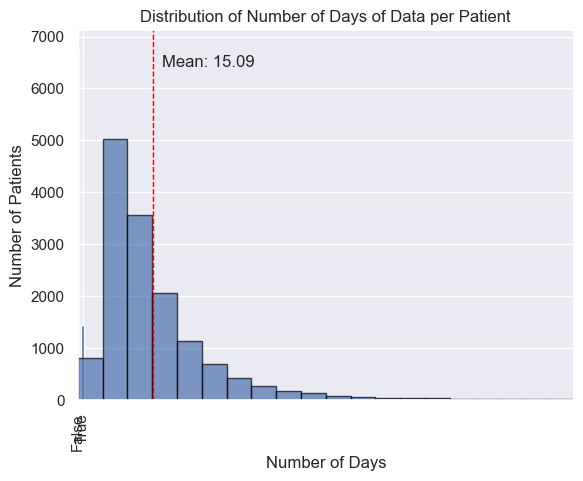

In [30]:

days_data_dict = {patient_id: len(records) for patient_id, records in ehr_data['feat_dict'].items()}


# Optionally, convert this dictionary to a list of days counts if you only need the numbers
days_data_list = list(days_data_dict.values())

# Print some statistics
import numpy as np
print(f"Average number of days of data per patient: {np.mean(days_data_list)}")
print(f"Minimum number of days of data: {np.min(days_data_list)}")
print(f"Maximum number of days of data: {np.max(days_data_list)}")

import matplotlib.pyplot as plt
import numpy as np

# Assuming days_data_list contains the number of days of data for each patient
max_days = max(days_data_list)  # Find the maximum number of days

# Create bins from 0 to max_days with a step of 5
bins = range(0, max_days + 5, 5)

plt.hist(days_data_list, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Days of Data per Patient')
plt.xlabel('Number of Days')
plt.ylabel('Number of Patients')
plt.xlim(0, 100)  # Set the x-axis limit to 100
plt.grid(True)  # Enable grid for better readability

# Optionally, add a vertical line for the mean
mean_days = np.mean(days_data_list)
plt.axvline(mean_days, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_days + 2, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(mean_days))

plt.show()

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty list to hold all feature data
all_features = []

# Assuming ehr_data dictionary with columns grouped by type
column_names = ehr_data['demo_cols'] + ehr_data['icd_cols'] + ehr_data['lab_cols'] + ehr_data['med_cols']

# Iterate through each key in the feature dictionary
for key, features in ehr_data['feat_dict'].items():
    if features.size > 0:  # Check if features is not an empty array
        # Calculate the mean across the first dimension (if multiple sets of features per ID)
        mean_features = np.mean(features, axis=0)
        all_features.append(mean_features)

# Convert the list of feature means to a DataFrame
all_features_df = pd.DataFrame(all_features, columns=column_names)

# Separate DataFrames for each feature type
demo_df = all_features_df[ehr_data['demo_cols']]
icd_df = all_features_df[ehr_data['icd_cols']]
lab_df = all_features_df[ehr_data['lab_cols']]
med_df = all_features_df[ehr_data['med_cols']]

# Function to plot feature averages
def plot_feature_averages(feature_means, title):
    plt.figure(figsize=(12, 6))
    feature_means.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Feature Names')
    plt.ylabel('Average Value')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Calculate and plot the mean of each type of features

all_features_df.shape



(14532, 171)

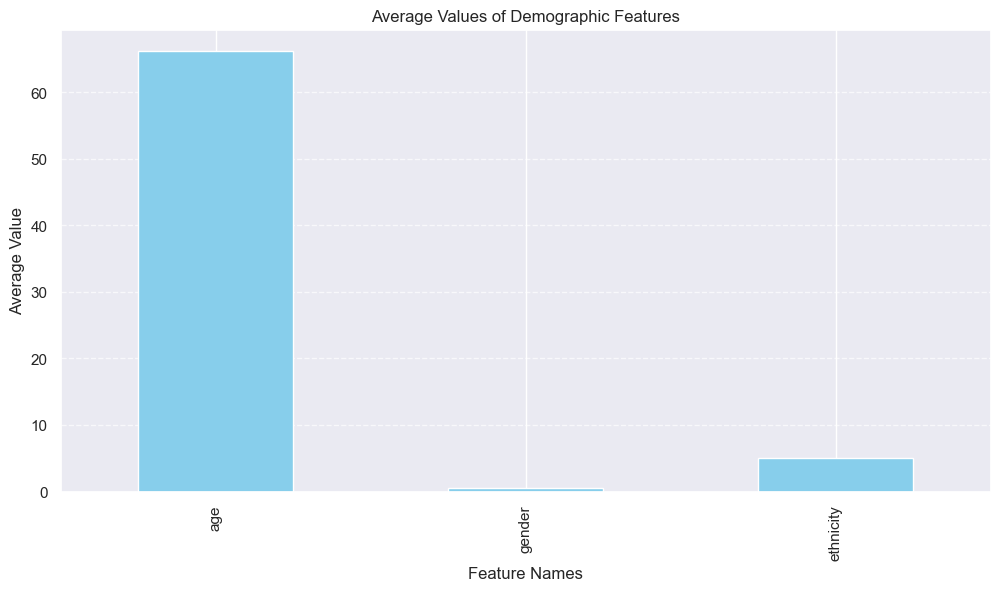

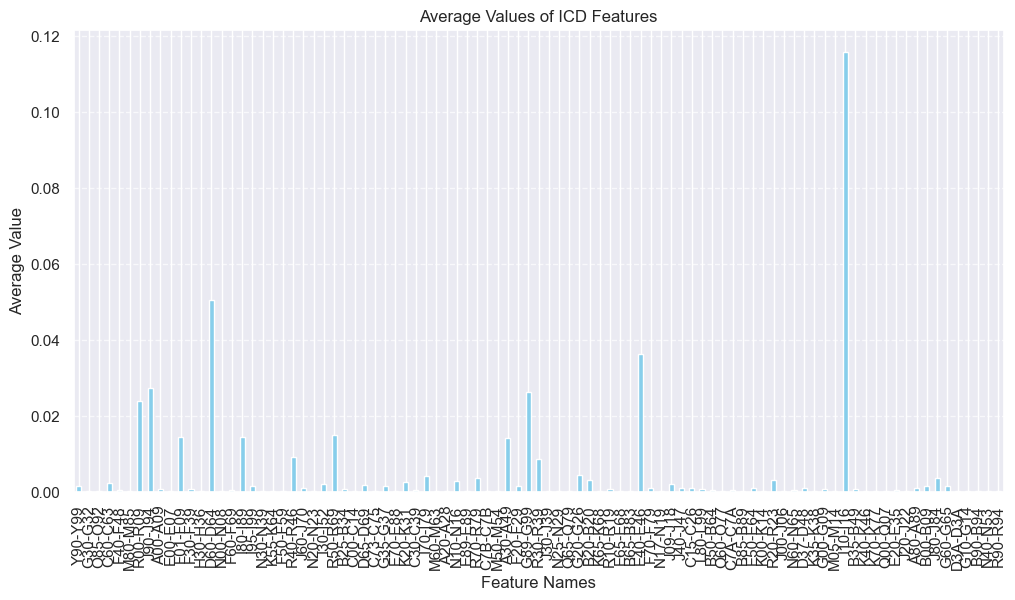

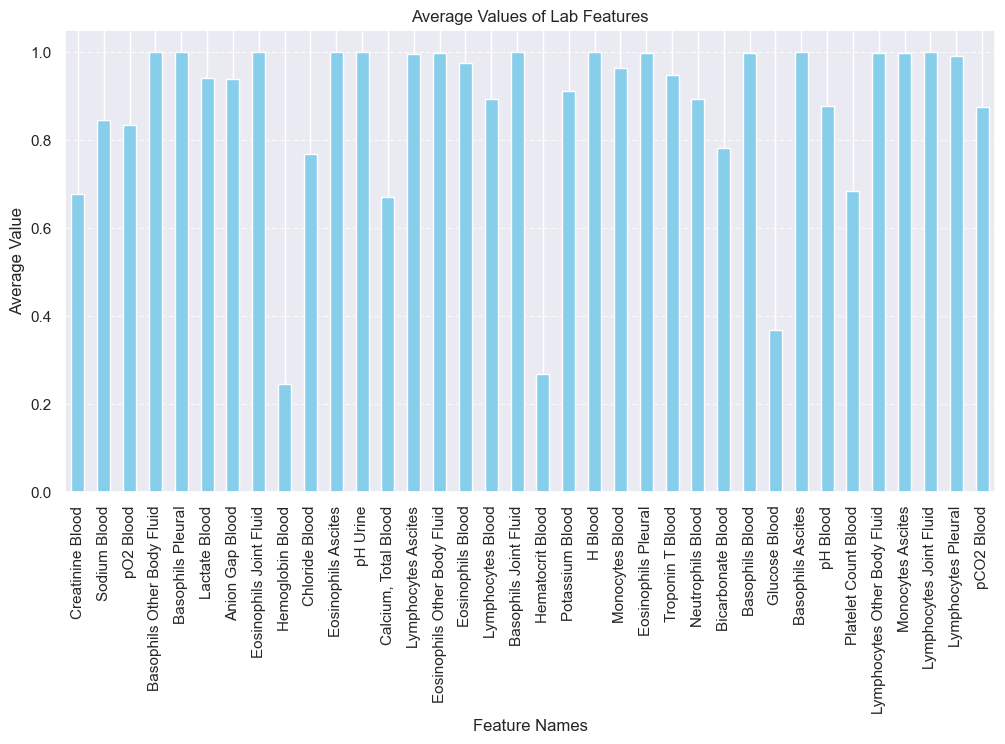

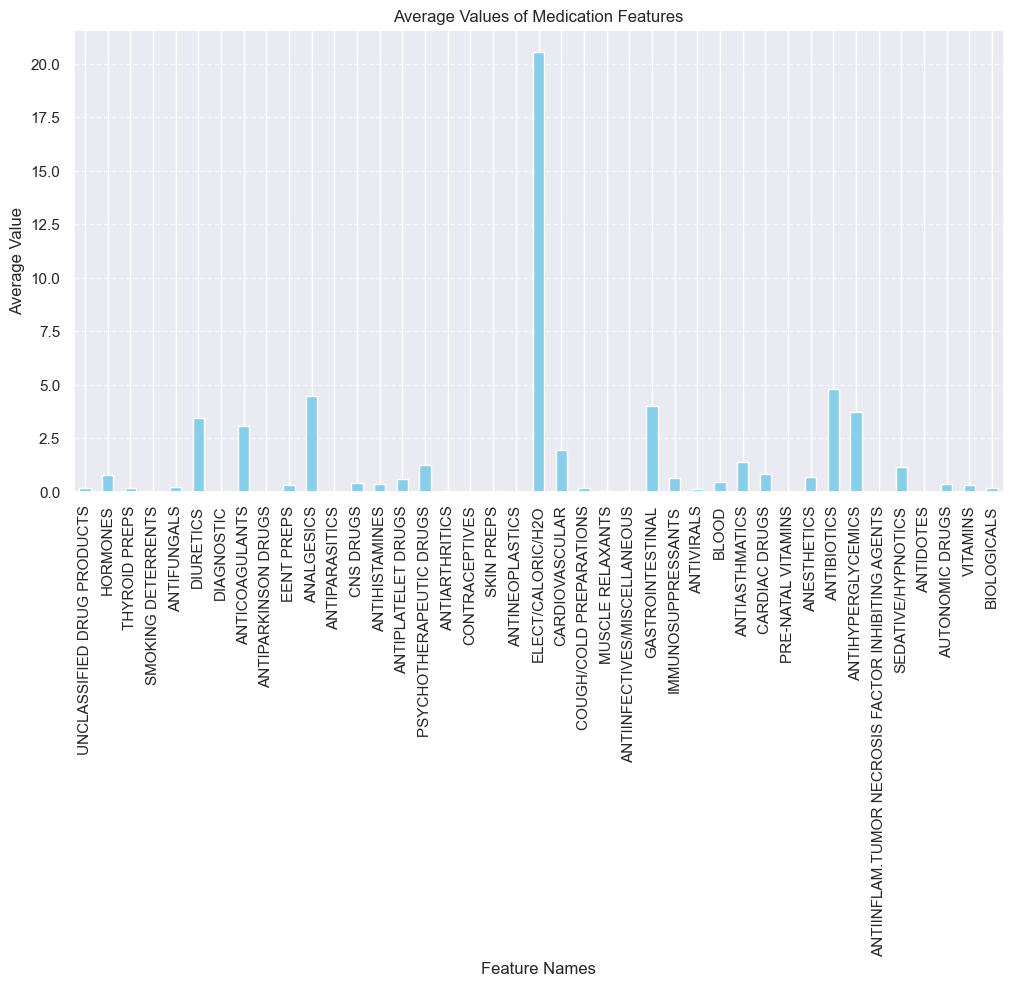

In [32]:
demo_means = demo_df.mean()
icd_means = icd_df.mean()
lab_means = lab_df.mean()
med_means = med_df.mean()

plot_feature_averages(demo_means, 'Average Values of Demographic Features')
plot_feature_averages(icd_means, 'Average Values of ICD Features')
plot_feature_averages(lab_means, 'Average Values of Lab Features')
plot_feature_averages(med_means, 'Average Values of Medication Features')

Zero counts in demographic features:
age             0
gender       6593
ethnicity      50
dtype: int64
Zero counts in ICD features:
Y90-Y99    14512
G30-G32    14528
O85-O92    14531
C60-C63    14499
F40-F48    14527
           ...  
D3A-D3A    14531
G10-G14    14528
B90-B94    14530
N40-N53    14528
R90-R94    14530
Length: 91, dtype: int64
Zero counts in lab features:
Creatinine Blood                 998
Sodium Blood                      72
pO2 Blood                         79
Basophils Other Body Fluid         0
Basophils Pleural                  0
Lactate Blood                     40
Anion Gap Blood                   20
Eosinophils Joint Fluid            0
Hemoglobin Blood                2442
Chloride Blood                   149
Eosinophils Ascites                0
pH Urine                           0
Calcium, Total Blood             281
Lymphocytes Ascites                0
Eosinophils Other Body Fluid       0
Eosinophils Blood                  2
Lymphocytes Blood                 

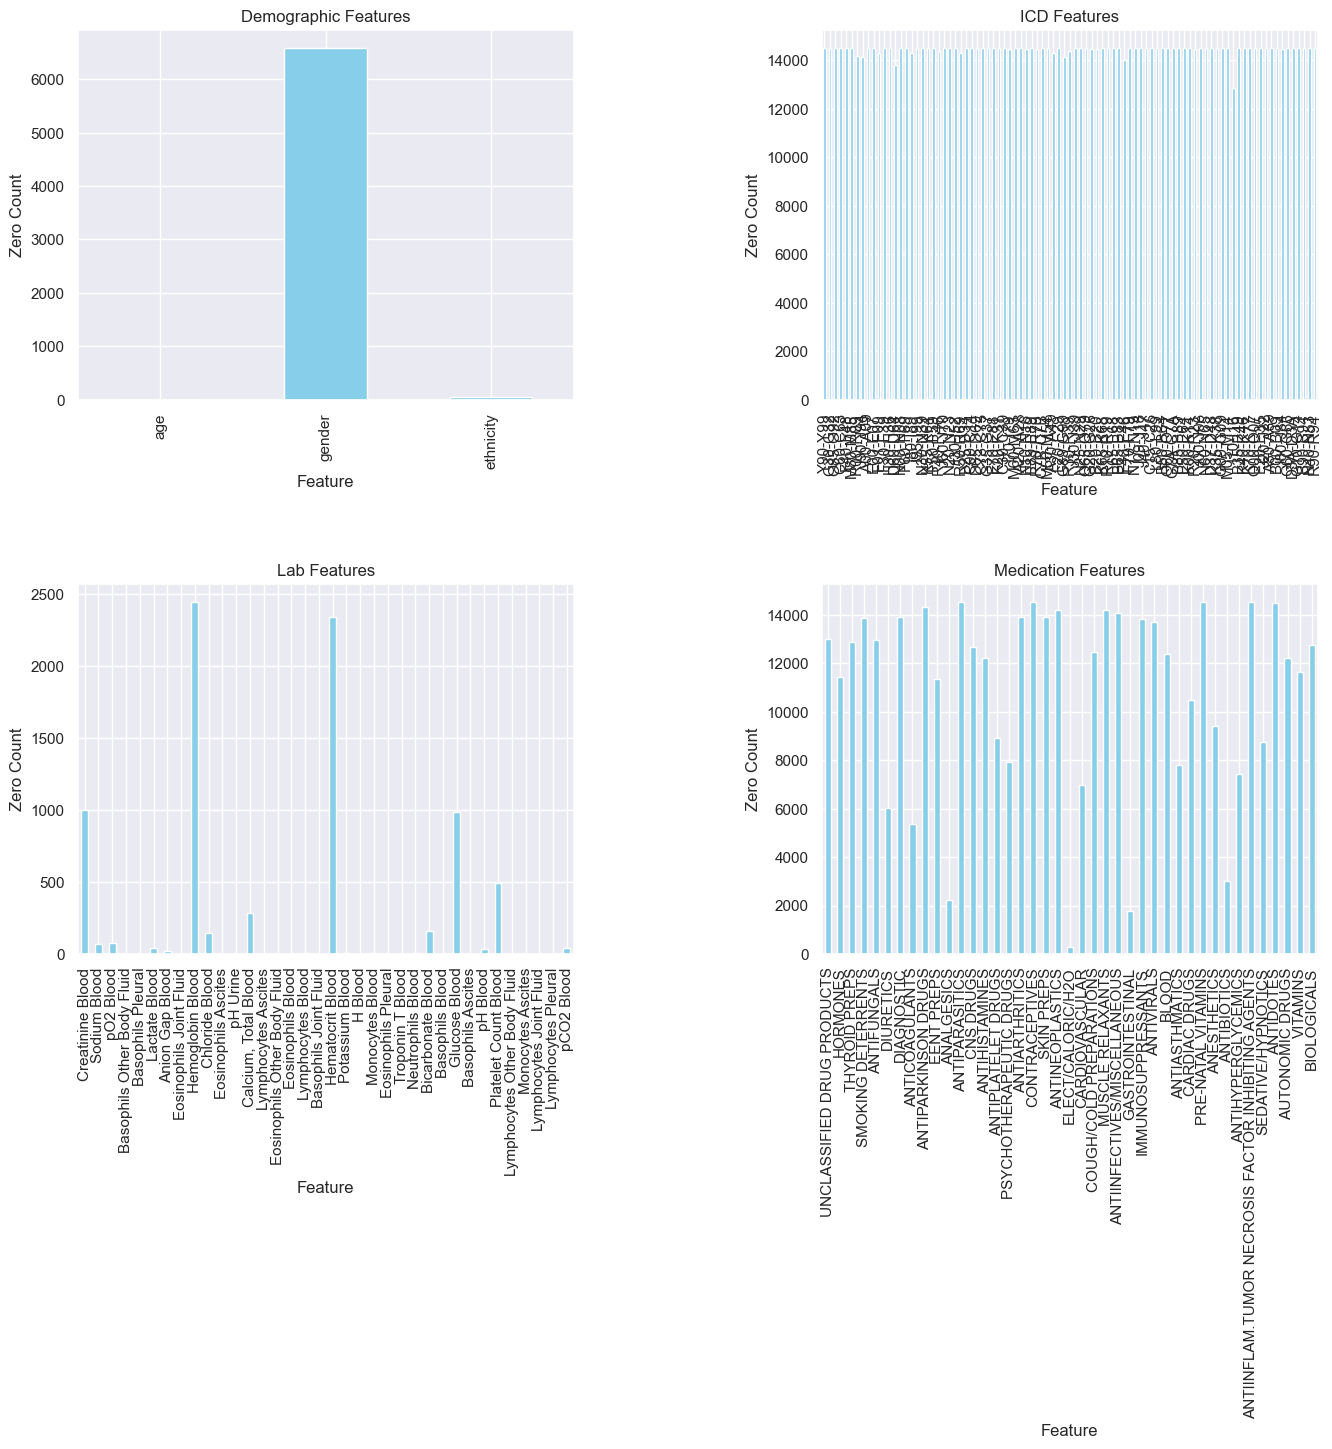

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming all_features_df is already defined and populated

# Define function to count zeros
def count_zeros(df):
    return (df == 0).sum()

# Calculate zero counts for each category
demo_zeros = count_zeros(all_features_df[ehr_data['demo_cols']])
icd_zeros = count_zeros(all_features_df[ehr_data['icd_cols']])
lab_zeros = count_zeros(all_features_df[ehr_data['lab_cols']])
med_zeros = count_zeros(all_features_df[ehr_data['med_cols']])

print("Zero counts in demographic features:")
print(demo_zeros)
print("Zero counts in ICD features:")
print(icd_zeros)
print("Zero counts in lab features:")
print(lab_zeros)
print("Zero counts in medication features:")
print(med_zeros)

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Customize spacing
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Titles for each subplot
titles = ['Demographic Features', 'ICD Features', 'Lab Features', 'Medication Features']

# Zero count data for each category
zero_data = [demo_zeros, icd_zeros, lab_zeros, med_zeros]

# Plot zero counts for each category
for ax, zero, title in zip(axs.flatten(), zero_data, titles):
    zero.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(title)
    ax.set_ylabel('Zero Count')
    ax.set_xlabel('Feature')
    ax.tick_params(axis='x', rotation=90)

plt.show()


Data Preprocessing

In [34]:
# Extract EHR features and IDs
ehr_features = ehr_data["feat_dict"]
ehr_ids = list(ehr_features.keys())

# Convert to DataFrame (each row is an admission)
ehr_df = pd.DataFrame({
    "id": ehr_ids,
    "ehr_matrix": [ehr_features[id] for id in ehr_ids]
})

# Merge with labels from train/val/test DataFrames
def merge_labels(df, ehr_df):
    return df[["id", "readmitted_within_30days"]].merge(ehr_df, on="id", how="inner")

train_ehr = merge_labels(train_df, ehr_df)
val_ehr = merge_labels(val_df, ehr_df)

def aggregate_ehr(df):
    # Aggregate features (example: mean over days)
    df["ehr_mean"] = df["ehr_matrix"].apply(lambda x: np.mean(x, axis=0))
    
    # Convert to numpy arrays
    X = np.stack(df["ehr_mean"].values)
    y = df["readmitted_within_30days"].astype(int).values
    
    return X, y

# Check for NaN/inf in all EHR matrices
def check_missing(ehr_dict):
    missing_counts = {}
    for id_, matrix in ehr_dict.items():
        missing_counts[id_] = np.isnan(matrix).sum() + np.isinf(matrix).sum()
    return missing_counts

missing_stats = check_missing(ehr_data["feat_dict"])
total_missing = sum(missing_stats.values())
print(f"Total missing values across all admissions: {total_missing}")

# Strategy 1: Replace impossible zeros with NaN → Impute
def fix_impossible_zeros(matrix, num_idxs):
    """Replace zeros in numerical features with NaN if biologically impossible."""
    matrix = matrix.copy()
    for idx in num_idxs:
        if ehr_data["feature_cols"][idx] in ["Creatinine Blood", "Hemoglobin Blood"]:  # Add impossible-zero features
            matrix[:, idx][matrix[:, idx] == 0] = np.nan
    return matrix

# Apply to all EHR matrices
ehr_data["feat_dict"] = {id_: fix_impossible_zeros(matrix, num_idxs) 
    for id_, matrix in ehr_data["feat_dict"].items()}
# Strategy: Treat zeros as valid categories (assuming 0="not prescribed")
# No action needed if zeros are meaningful
# Add binary mask features to indicate "was this feature recorded?"
def add_mask_features(ehr_data):
    for id_, matrix in ehr_data["feat_dict"].items():
        mask = (matrix != 0).astype(int)  # 1=recorded, 0=missing
        ehr_data["feat_dict"][id_] = np.hstack([matrix, mask])
    return ehr_data

ehr_data = add_mask_features(ehr_data)


def impute_temporal(ehr_dict):
    for id_, matrix in ehr_dict.items():
        df = pd.DataFrame(matrix)
        df.fillna(method='ffill', inplace=True)  # Forward-fill within admission
        ehr_dict[id_] = df.values
    return ehr_dict

ehr_data["feat_dict"] = impute_temporal(ehr_data["feat_dict"])


# Check if impossible zeros remain
for feature in ["Creatinine Blood", "Hemoglobin Blood"]:
    idx = ehr_data["feature_cols"].index(feature)
    zeros_remaining = np.sum([np.sum(matrix[:, idx] == 0) 
                           for matrix in ehr_data["feat_dict"].values()])
    print(f"{feature}: {zeros_remaining} zeros remaining (should be 0)")


Total missing values across all admissions: 0


NameError: name 'num_idxs' is not defined

In [ ]:
import numpy as np
import pandas as pd

# Extract EHR features and IDs
ehr_features = ehr_data["feat_dict"]
ehr_ids = list(ehr_features.keys())

# Convert to DataFrame (each row is an admission)
ehr_df = pd.DataFrame({
    "id": ehr_ids,
    "ehr_matrix": [ehr_features[id] for id in ehr_ids]
})

# Merge with labels from train/val/test DataFrames
def merge_labels(df, ehr_df):
    return df[["id", "readmitted_within_30days"]].merge(ehr_df, on="id", how="inner")

train_ehr = merge_labels(train_df, ehr_df)
val_ehr = merge_labels(val_df, ehr_df)

def aggregate_ehr(df):
    # Aggregate features (example: mean over days)
    df["ehr_mean"] = df["ehr_matrix"].apply(lambda x: np.mean(x, axis=0))
    
    # Convert to numpy arrays
    X = np.stack(df["ehr_mean"].values)
    y = df["readmitted_within_30days"].astype(int).values
    
    return X, y

X_train, y_train = aggregate_ehr(train_ehr)
X_val, y_val = aggregate_ehr(val_ehr)


In [ ]:
print(X_train.shape)
print(X_train)

(49451, 171)
[[52.  1.  6. ...  0.  0.  0.]
 [52.  1.  6. ...  0.  0.  0.]
 [52.  1.  6. ...  0.  0.  0.]
 ...
 [91.  1.  6. ...  0.  0.  1.]
 [69.  0.  6. ...  0.  0.  0.]
 [69.  0.  6. ...  0.  0.  0.]]


ValueError: DataFrame constructor not properly called!

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (49451,) + inhomogeneous part.